<a href="https://colab.research.google.com/github/HowardHNguyen/Python/blob/main/Data_Wrangling_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/_Python/learning-python-predictive-analytics-master/Ch02'
filename = 'titanic3.csv'
fullpath = path+'/'+filename

In [ ]:
data = pd.read_csv(fullpath)

In [ ]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
# data dimension
data.shape

(1310, 14)

In [ ]:
# list data in df
data.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype=object)

In [ ]:
# create summary statistics
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [ ]:
# data type for each column
data.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [ ]:
# find records which's missing data
pd.isnull(data['body'])

0        True
1        True
2        True
3       False
4        True
        ...  
1305     True
1306    False
1307     True
1308     True
1309     True
Name: body, Length: 1310, dtype: bool

In [ ]:
# opposite method
pd.notnull(data['body'])

0       False
1       False
2       False
3        True
4       False
        ...  
1305    False
1306     True
1307    False
1308    False
1309    False
Name: body, Length: 1310, dtype: bool

In [ ]:
# count the number of missing values
pd.isnull(data['body']).values.ravel().sum()

1189

In [ ]:
pd.notnull(data['body']).values.ravel().sum()

121

In [ ]:
# HANDLE MISSING DATA
# deletion
# drop any row with where all columns have missing info
data.dropna(axis=0, how='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
# drop any rows where column have any empty cells of information
data.dropna(axis=0, how='any')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [ ]:
# IMPUTATION
# data.fillna(0)
# data.fillna('missing')
data['body'].fillna(0)

0         0.0
1         0.0
2         0.0
3       135.0
4         0.0
        ...  
1305      0.0
1306    304.0
1307      0.0
1308      0.0
1309      0.0
Name: body, Length: 1310, dtype: float64

In [ ]:
# replace missing data with mean values
data['age'].fillna(data['age'].mean())

0       29.000000
1        0.916700
2        2.000000
3       30.000000
4       25.000000
          ...    
1305    29.881135
1306    26.500000
1307    27.000000
1308    29.000000
1309    29.881135
Name: age, Length: 1310, dtype: float64

In [ ]:
# fill in with preceding non-missing value
data['age'].fillna(method='ffill')

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1305    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
1309    29.0000
Name: age, Length: 1310, dtype: float64

In [ ]:
# fill in with succeding non-mission value
data['age'].fillna(method='backfill')

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1305    26.5000
1306    26.5000
1307    27.0000
1308    29.0000
1309        NaN
Name: age, Length: 1310, dtype: float64

In [ ]:
# CREATE DUMMY VAR
# split into new var 'sex_female' and 'sex_male'
dummy_sex = pd.get_dummies(data['sex'], prefix='sex')
column_name = data.columns.values.tolist()
column_name.remove('sex') # remove column 'sex'
data[column_name].join(dummy_sex) # add dummy column created above

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,1.0,0.0,"Allison, Miss. Helen Loraine",2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,1,0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,1
1307,3.0,0.0,"Zakarian, Mr. Ortin",27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,1
1308,3.0,0.0,"Zimmerman, Mr. Leo",29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0,1


In [ ]:
# PLOT DATA

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data_ccm = pd.read_csv('/content/drive/MyDrive/_Python/learning-python-predictive-analytics-master/Ch02/Customer Churn Model.txt')
data_ccm.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


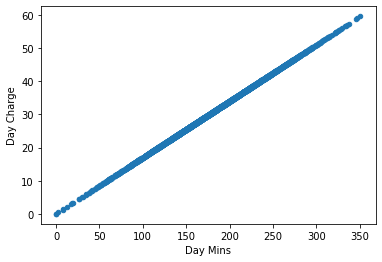

In [ ]:
# scatterplot
data_ccm.plot(kind='scatter', x='Day Mins', y='Day Charge')

In [ ]:
figure.set_figheight(15)
figure.set_figwidth(15)

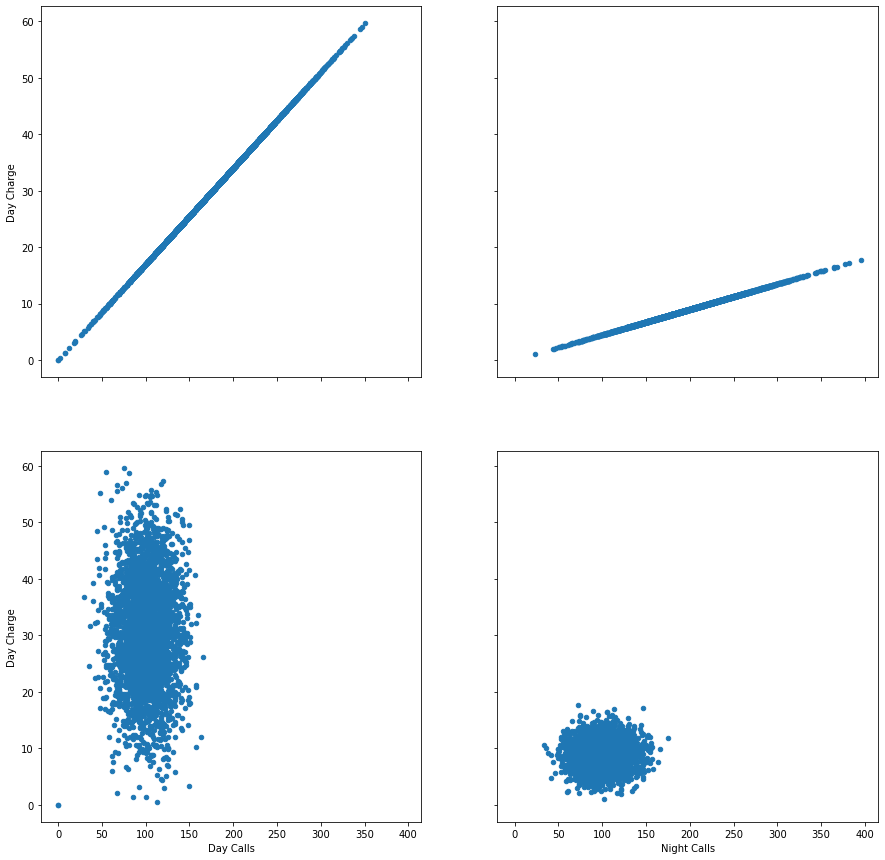

In [ ]:
# USING PLOTLIB
figure,axs = plt.subplots(2,2,sharey=True,sharex=True,figsize=(15,15))
data_ccm.plot(kind='scatter',x='Day Mins',y='Day Charge',ax=axs[0][0])
data_ccm.plot(kind='scatter',x='Night Mins',y='Night Charge',ax=axs[0][1])
data_ccm.plot(kind='scatter',x='Day Calls',y='Day Charge',ax=axs[1][0])
data_ccm.plot(kind='scatter',x='Night Calls',y='Night Charge',ax=axs[1][1])

In [ ]:
# Save figure as a jpeg
#figname = 'ScatterPlots.jpeg'
#figpath = path+'/'+filename
#figure.savefig(figname)

Text(0.5, 1.0, 'Frequency of Day Calls')

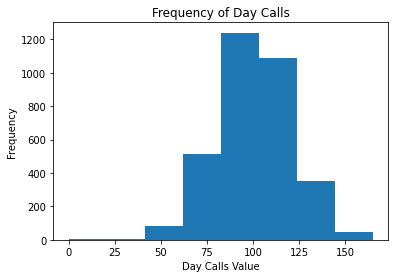

In [ ]:
# Histograms
plt.hist(data_ccm['Day Calls'],bins=8)
plt.xlabel('Day Calls Value')
plt.ylabel('Frequency')
plt.title('Frequency of Day Calls')


Text(0.5, 1.0, 'Boxplot of Day Calls')

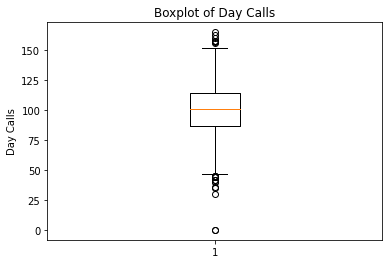

In [ ]:
# Boxplots
plt.boxplot(data_ccm['Day Calls'])
plt.ylabel('Day Calls')
plt.title('Boxplot of Day Calls')